Решить краевую задачу для ОДУ второго порядка методом стрельбы.   
(x^2-1)y'' + (x-3)y' - y = 0, y(0) = -2, y'(1)+ y(1) = -0.75


In [7]:
import numpy as np
import matplotlib.pyplot as plt

#y' = z
g = lambda x, y, z: z

#z' = (y - (x-3)*z)/(x^2 - 1)
f = lambda x, y, z: (y - (x-3)*z)/(x**2 - 1)

def Runge_Kutta(arr_x, h, init_values):
    arr_y = np.zeros(len(arr_x))
    arr_y[0] = init_values[0]
    arr_z = np.zeros(len(arr_x))
    arr_z[0] = init_values[1]
    for i in range(1, len(arr_x)):
        k1 = f(arr_x[i-1], arr_y[i-1], arr_z[i-1])
        q1 = g(arr_x[i-1], arr_y[i-1], arr_z[i-1])
        k2 = f(arr_x[i-1] + h/2, arr_y[i-1] + q1 * h / 2, arr_z[i-1] + k1 * h / 2)
        q2 = g(arr_x[i-1] + h/2, arr_y[i-1] + q1 * h / 2, arr_z[i-1] + k1 * h / 2)
        k3 = f(arr_x[i-1] + h/2, arr_y[i-1] + q2 * h / 2, arr_z[i-1] + k1 * h / 2)
        q3 = g(arr_x[i-1] + h/2, arr_y[i-1] + q2 * h / 2, arr_z[i-1] + k1 * h / 2)
        k4 = f(arr_x[i-1] + h, arr_y[i-1] + q3 * h, arr_z[i-1] + q3 * h)
        q4 = g(arr_x[i-1] + h, arr_y[i-1] + q3 * h, arr_z[i-1] + q3 * h)
        
        arr_z[i] = arr_z[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6
        arr_y[i] = arr_y[i-1] + h*(q1 + 2*q2 + 2*q3 + q4)/6

    return (arr_y, arr_z)

h = 0.01
x_arr = np.arange(0, 1-h, h)

borders = (-2, -1.515)
#tg(a) = (y1 - y0)/(b-a)
init_values = [-2, 0.5]
alpha = np.arctan(init_values[1])

eps = 0.0001

results = []

res = Runge_Kutta(x_arr, h, init_values)
diff = res[0][-1] - borders[1]
if diff > 0:
    while True:
        old_alpha = alpha
        alpha -= 0.01
        init_values[1] = np.tan(alpha)
        res = Runge_Kutta(x_arr, h, init_values)
        diff = res[0][-1] - borders[1]
        if diff < 0:
            new_alpha = alpha
            break
        
elif diff < 0:
    while True:
        old_alpha = alpha
        alpha += 0.01
        init_values[1] = np.tan(alpha)
        res = Runge_Kutta(x_arr, h, init_values)
        diff = res[0][-1] - borders[1]
        if diff > 0:
            new_alpha = alpha
            break

eps = 0.000001
if new_alpha > old_alpha:
    left_alpha = old_alpha
    right_alpha = new_alpha
else:
    left_alpha = new_alpha
    right_alpha = old_alpha
    
while True:
    init_values[1] = np.tan(left_alpha)
    res_1 = Runge_Kutta(x_arr, h, init_values)
   
    mid_alpha = (left_alpha + right_alpha) / 2
    init_values[1] = np.tan(mid_alpha)
    res_2 = Runge_Kutta(x_arr, h, init_values)
    
    diff_1 = res_1[0][-1] - borders[1]
    diff_2 = res_2[0][-1] - borders[1]
    
    if np.abs(diff_1) < eps:
        print("alpha = ", np.tan(left_alpha), "y = ", res_1[0], "y' =", res_1[1], sep='\n')
        break
    
    if diff_1 * diff_2 > 0:
        left_alpha = mid_alpha
    else:
        right_alpha = mid_alpha

    





    


alpha = 
-0.00039780117642762287
y = 
[-2.         -1.99993711 -1.99967775 -1.99922768 -1.99859245 -1.99777739
 -1.99678764 -1.99562813 -1.99430361 -1.99281866 -1.9911777  -1.98938497
 -1.98744457 -1.98536046 -1.98313644 -1.98077619 -1.97828327 -1.97566111
 -1.97291301 -1.97004218 -1.96705171 -1.96394459 -1.96072372 -1.95739188
 -1.95395178 -1.95040606 -1.94675723 -1.94300776 -1.93916002 -1.93521632
 -1.93117888 -1.92704989 -1.92283142 -1.91852552 -1.91413417 -1.90965927
 -1.90510268 -1.90046621 -1.89575161 -1.89096059 -1.88609478 -1.8811558
 -1.87614521 -1.87106451 -1.8659152  -1.86069869 -1.85541638 -1.85006962
 -1.84465974 -1.83918801 -1.83365569 -1.82806399 -1.82241409 -1.81670714
 -1.81094427 -1.80512657 -1.79925511 -1.79333091 -1.787355   -1.78132835
 -1.77525194 -1.76912669 -1.76295352 -1.75673333 -1.75046697 -1.74415531
 -1.73779916 -1.73139935 -1.72495664 -1.71847183 -1.71194565 -1.70537884
 -1.69877213 -1.69212621 -1.68544177 -1.67871947 -1.67195998 -1.66516392
 -1.65833194 -

Text(0, 0.5, 'y')

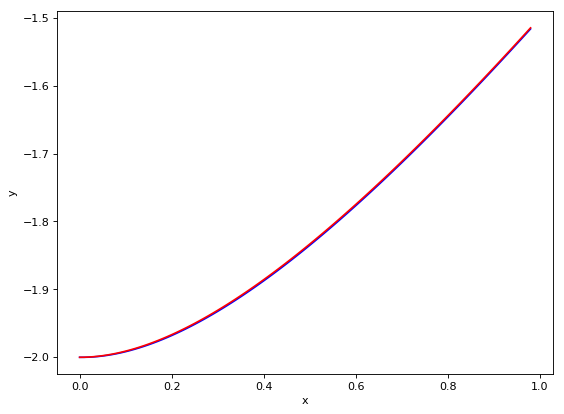

In [9]:
y = lambda x: x-3+1/(x+1)
y_true = [y(x) for x in x_arr]
y_arr = res[0]
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_arr, y_arr, 'b', x_arr, y_true, 'r')
plt.xlabel('x')
plt.ylabel('y')